Dataset Head:
     Station       PM10      PM2.5        NO2        SO2        CO  \
0  Station_D  93.890645  37.234552   9.750302  16.436464  0.412145   
1  Station_E  60.861987   8.243795  45.452312   3.994685  1.588007   
2  Station_C  72.698574   8.206553  68.776559   6.003192  0.332746   
3  Station_E  93.024944   5.544881  17.356997  17.471255  1.306323   
4  Station_E  73.651477  48.042563  56.518683   9.594371  0.335307   

           O3  Temperature   Humidity Pollution_Level  
0   24.932044    34.232229  86.842672             Low  
1  117.518200    21.256893  48.226269        Moderate  
2  116.078856    16.960891  51.679022             Low  
3   28.010185    25.536343  53.173672        Moderate  
4   42.936544    16.141982  41.891007        Moderate  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station    

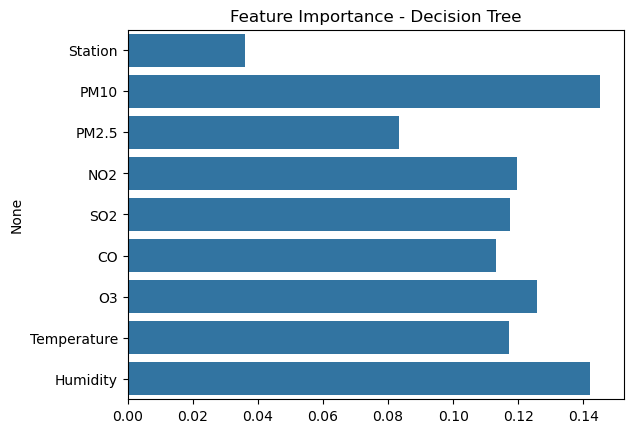

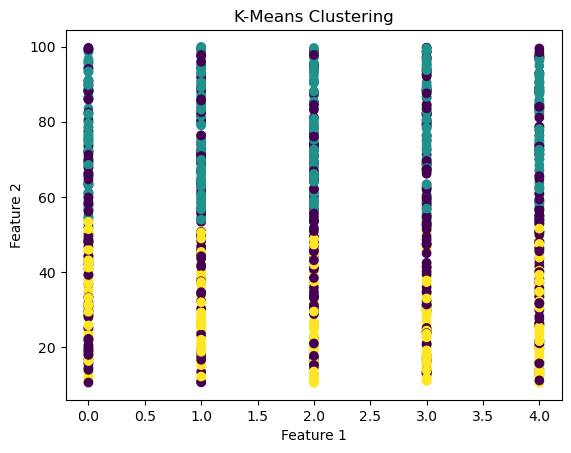

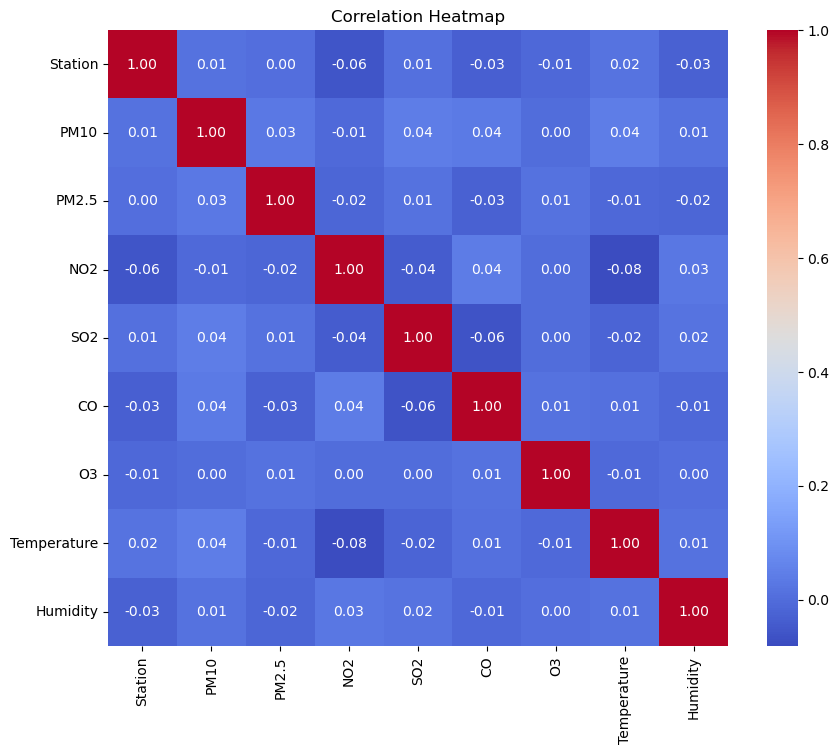

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score, silhouette_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------- 1. Data Loading and Exploration ----------------------

# Load the dataset
data = pd.read_csv('air_quality_synthetic.csv')

# Display basic information
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())

# ---------------------- 2. Data Preprocessing ----------------------

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Encode 'Station' column
label_encoder = LabelEncoder()
data['Station'] = label_encoder.fit_transform(data['Station'])

# Define features and target for classification
X = data.drop(columns=['Pollution_Level'], errors='ignore')  # Features for classification
y = data['Pollution_Level']  # Target for classification

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------- 3. Model Implementation ----------------------

# a. Support Vector Machine (SVM)
print("\nSupport Vector Machines (SVM):")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# b. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# c. Decision Tree Classifier
print("\nDecision Tree:")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# d. Linear Regression (using PM2.5 as target for regression)
print("\nLinear Regression:")
y_reg = data['PM2.5']  # Define regression target
X_reg = data.drop(columns=['PM2.5', 'Pollution_Level'], errors='ignore')  # Exclude non-relevant columns
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)
linear_model = LinearRegression()
linear_model.fit(X_train_reg_scaled, y_train_reg)
y_pred_lr = linear_model.predict(X_test_reg_scaled)
print("Linear Regression MSE:", mean_squared_error(y_test_reg, y_pred_lr))
print("Linear Regression R^2 Score:", r2_score(y_test_reg, y_pred_lr))

# e. K-Means Clustering
print("\nK-Means Clustering:")
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X.drop(columns=['Cluster'], errors='ignore'))
X['Cluster'] = clusters  # Add clusters to the dataset
print("K-Means Silhouette Score:", silhouette_score(X, clusters))

# ---------------------- 4. Data Visualization ----------------------

# a. Feature Importance for Decision Tree
importance = dt_model.feature_importances_
feature_names = X.columns[:-1]  # Exclude 'Cluster' column
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importance - Decision Tree")
plt.show()

# b. Clustering Visualization (using first two features)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# ---------------------- 4. Data Visualization ----------------------

# c. Correlation Heatmap 
numeric_data = data.select_dtypes(include=[np.number])  # Only select numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
a
# ---------------------- End of Code ----------------------
